# Twitter Sentiment Analysis Of Covid 19 Dataset

### importing  Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
import warnings
from nltk.corpus import stopwords
#nltk.download('stopwords')
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv('data/twitter_set.csv')


# 1) Data Gathering & overview :-

In [3]:
with open('Corona_NLP_train.csv', 'r', encoding='UTF-8', errors='replace') as f:
    data = f.read()


In [4]:
data = pd.read_csv('Corona_NLP.csv',encoding='latin_1')


In [5]:
data.head(10)

,UserName,ScreenName,Location,TweetAt,Sentiment,OriginalTweet
0,3799,48751,London,16-03-2020,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,Negative,"Me, ready to go at supermarket during the #COV..."
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,Positive,As news of the regionÂs first confirmed COVID...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Positive,Cashier at grocery store was sharing his insig...
7,3806,48758,Austria,16-03-2020,Neutral,Was at the supermarket today. Didn't buy toile...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Positive,Due to COVID-19 our retail store and classroom...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,Negative,"For corona prevention,we should stop to buy th..."


In [6]:
data.rename(columns = {'OriginalTweet':'Tweet content'}, inplace = True)

In [7]:
len(data)

41157

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.head()


,UserName,ScreenName,Location,TweetAt,Sentiment,Tweet content
0,3799,48751,London,16-03-2020,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,Negative,"Me, ready to go at supermarket during the #COV..."


In [10]:
# last 5 rows of the dataset
data.tail()

,UserName,ScreenName,Location,TweetAt,Sentiment,Tweet content
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Neutral,Airline pilots offering to stock supermarket s...
41153,44952,89904,NaN,14-04-2020,Negative,Response to complaint not provided citing COVI...
41154,44953,89905,NaN,14-04-2020,Positive,You know itÂs getting tough when @KameronWild...
41155,44954,89906,NaN,14-04-2020,Neutral,Is it wrong that the smell of hand sanitizer i...
41156,44955,89907,i love you so much || he/him,14-04-2020,Negative,@TartiiCat Well new/used Rift S are going for ...


In [11]:
# dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   Sentiment      41157 non-null  object
 5   Tweet content  41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [12]:
data.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
Sentiment        object
Tweet content    object
dtype: object

In [13]:
# checking the number of missing values in each column
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
Sentiment           0
Tweet content       0
dtype: int64

In [14]:
# distribution of TWITTER data set 
data['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [15]:
p = data['Location'].value_counts()

In [16]:
p

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

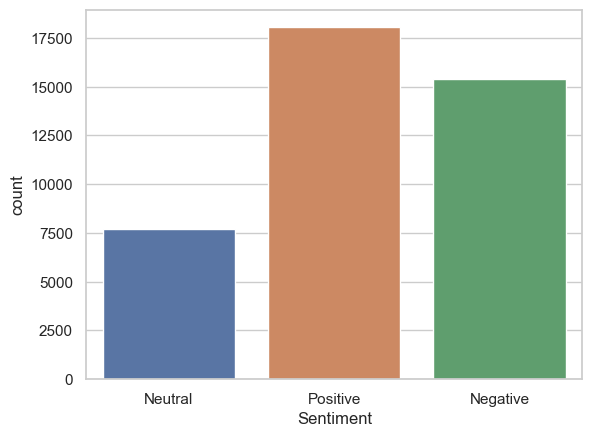

In [17]:
sns.set_theme(style="whitegrid")
sns.countplot(x = data["Sentiment"])


In [18]:
# data['Sentiment'] = data['Sentiment'].replace(['Positive'], 1)
# data['Sentiment'] = data['Sentiment'].replace(['Negative'], -1)
# data['Sentiment'] = data['Sentiment'].replace(['Neutral'], 0)
# data['Sentiment'] = data['Sentiment'].replace(['Irrelevant'], 9999)
# data.head(50)

In [19]:
data['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [20]:
data.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
Sentiment        object
Tweet content    object
dtype: object

In [21]:
#Count information per category
plot1=data.groupby(by=["UserName","Sentiment"]).count().reset_index()
plot1.head()

,UserName,Sentiment,ScreenName,Location,TweetAt,Tweet content
0,3799,Neutral,1,1,1,1
1,3800,Positive,1,1,1,1
2,3801,Positive,1,1,1,1
3,3802,Positive,1,0,1,1
4,3803,Negative,1,0,1,1


# 2) Preprocessing Of Data 



#### 𝟏 - 𝐂𝐚𝐬𝐢𝐧𝐠
#### 𝟐 - 𝐍𝐨𝐢𝐬𝐞 𝐑𝐞𝐦𝐨𝐯𝐚𝐥
#### 𝟑 - 𝐓𝐨𝐤𝐞𝐧𝐢𝐳𝐚𝐭𝐢𝐨𝐧
#### 𝟒 - 𝐒𝐭𝐨𝐩 𝐖𝐨𝐫𝐝 𝐑𝐞𝐦𝐨𝐯𝐚𝐥
#### 𝟓 - 𝐓𝐞𝐱𝐭 𝐍𝐨𝐫𝐦𝐚𝐥𝐢𝐬𝐚𝐭𝐢𝐨𝐧

In [22]:
# convert all text into lowercase 
def convert_str(input_text):
    return str(input_text).lower()

# remove all pattern in the input text 
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,str(input_txt))
    for word in r:
        input_txt = re.sub(word,"",input_txt)
    return input_txt
        
        

In [23]:
# np.vectorize(convert_str)(data['Tweet content'])

In [24]:
# convert all text into lowercase 
data['clean_tweet'] = np.vectorize(convert_str)(data['Tweet content'])

In [25]:
data.head()

,UserName,ScreenName,Location,TweetAt,Sentiment,Tweet content,clean_tweet
0,3799,48751,London,16-03-2020,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,@menyrbie @phil_gahan @chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,Positive,advice Talk to your neighbours family to excha...,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Positive,Coronavirus Australia: Woolworths to give elde...,coronavirus australia: woolworths to give elde...
3,3802,48754,NaN,16-03-2020,Positive,My food stock is not the only one which is emp...,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,Negative,"Me, ready to go at supermarket during the #COV...","me, ready to go at supermarket during the #cov..."


# 𝐍𝐨𝐢𝐬𝐞 𝐑𝐞𝐦𝐨𝐯𝐚𝐥

#### 1 - remove urls
#### 2 - remove twitter handles
#### 3 - removing Punctuation, special characters and numbers

In [26]:
def clean(text):

    #     remove urls
    text = re.sub(r'http\S+', " ", text)
    
    return text

In [27]:
### remove urls
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: clean(x))

In [28]:
data.head()

,UserName,ScreenName,Location,TweetAt,Sentiment,Tweet content,clean_tweet
0,3799,48751,London,16-03-2020,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,@menyrbie @phil_gahan @chrisitv and and
1,3800,48752,UK,16-03-2020,Positive,advice Talk to your neighbours family to excha...,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Positive,Coronavirus Australia: Woolworths to give elde...,coronavirus australia: woolworths to give elde...
3,3802,48754,NaN,16-03-2020,Positive,My food stock is not the only one which is emp...,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,Negative,"Me, ready to go at supermarket during the #COV...","me, ready to go at supermarket during the #cov..."


In [29]:
#removal twitter handles
data['clean_tweet'] =data['clean_tweet'].str.replace("@[^ ]+","")

In [30]:
data.head()

,UserName,ScreenName,Location,TweetAt,Sentiment,Tweet content,clean_tweet
0,3799,48751,London,16-03-2020,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,and and
1,3800,48752,UK,16-03-2020,Positive,advice Talk to your neighbours family to excha...,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Positive,Coronavirus Australia: Woolworths to give elde...,coronavirus australia: woolworths to give elde...
3,3802,48754,NaN,16-03-2020,Positive,My food stock is not the only one which is emp...,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,Negative,"Me, ready to go at supermarket during the #COV...","me, ready to go at supermarket during the #cov..."


In [31]:
# removing Punctuation, special characters and numbers
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z*]"," ")

In [32]:
data.head()

,UserName,ScreenName,Location,TweetAt,Sentiment,Tweet content,clean_tweet
0,3799,48751,London,16-03-2020,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,and and
1,3800,48752,UK,16-03-2020,Positive,advice Talk to your neighbours family to excha...,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Positive,Coronavirus Australia: Woolworths to give elde...,coronavirus australia woolworths to give elde...
3,3802,48754,NaN,16-03-2020,Positive,My food stock is not the only one which is emp...,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,Negative,"Me, ready to go at supermarket during the #COV...",me ready to go at supermarket during the cov...


In [33]:
data["clean_tweet"].iloc[2]


'coronavirus australia  woolworths to give elderly  disabled dedicated shopping hours amid covid    outbreak  '

# Stop Word Removal

In [34]:
#Stop Words
# stopwords.words('English')
stop_words = set(stopwords.words('english'))
# print (list(stop_words))
print(stop_words)

{"you'd", 'any', 'because', "doesn't", 'same', 'who', "hadn't", 'is', 'has', 'needn', 'at', 'ours', 'll', 'you', 'most', 'in', 'himself', 'them', 'only', 'just', 'had', 'but', 'here', 'own', 'won', 'hers', 'were', "isn't", 'all', 'itself', "should've", 'ma', 'which', 'our', 'her', 'herself', 'after', 'yourselves', 'ourselves', 'does', 'we', 'as', 'into', 'few', 'off', 'not', 'wasn', "aren't", 'did', 'that', 'through', 'how', 'yourself', 'some', 'and', 'theirs', "didn't", "shan't", "she's", 'their', 're', 'both', 'more', 'between', 'doesn', 'o', 'what', 'over', 'so', 'those', "you'll", 'its', 'd', 'under', "needn't", 'about', 'during', 'they', 'while', 'with', "shouldn't", "wasn't", 'too', 'for', "don't", 's', 'couldn', 'on', 'then', 'it', 'shan', 'be', 'by', 'my', 'hasn', 'y', 'until', 'mightn', 'shouldn', 'being', 'weren', 'from', 'can', 'aren', 'have', "it's", 'why', 'been', 'myself', 'up', 'was', 'should', 'i', 'whom', 'him', 'down', 'didn', "weren't", 'nor', 'of', 'this', "hasn't",

In [35]:
pat = r'\b(?:{})\b'.format('|'.join(stop_words))
data['filtered'] = data['clean_tweet'].str.replace(pat, '')
data['filtered']= data['filtered'].str.replace(r'\s+', ' ')
data.head(20)


,UserName,ScreenName,Location,TweetAt,Sentiment,Tweet content,clean_tweet,filtered
0,3799,48751,London,16-03-2020,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,and and,
1,3800,48752,UK,16-03-2020,Positive,advice Talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Positive,Coronavirus Australia: Woolworths to give elde...,coronavirus australia woolworths to give elde...,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,Positive,My food stock is not the only one which is emp...,my food stock is not the only one which is emp...,food stock one empty please panic enough food...
4,3803,48755,NaN,16-03-2020,Negative,"Me, ready to go at supermarket during the #COV...",me ready to go at supermarket during the cov...,ready go supermarket covid outbreak paranoid ...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,Positive,As news of the regionÂs first confirmed COVID...,as news of the region s first confirmed covid...,news region first confirmed covid case came s...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Positive,Cashier at grocery store was sharing his insig...,cashier at grocery store was sharing his insig...,cashier grocery store sharing insights covid p...
7,3806,48758,Austria,16-03-2020,Neutral,Was at the supermarket today. Didn't buy toile...,was at the supermarket today didn t buy toile...,supermarket today buy toilet paper rebel toil...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Positive,Due to COVID-19 our retail store and classroom...,due to covid our retail store and classroom...,due covid retail store classroom atlanta open ...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,Negative,"For corona prevention,we should stop to buy th...",for corona prevention we should stop to buy th...,corona prevention stop buy things cash use on...


# Tokenization

In [36]:
tokenized_tweet = data['filtered'].apply(lambda x:x.split())
tokenized_tweet.head()


0                                                   []
1    [advice, talk, neighbours, family, exchange, p...
2    [coronavirus, australia, woolworths, give, eld...
3    [food, stock, one, empty, please, panic, enoug...
4    [ready, go, supermarket, covid, outbreak, para...
Name: filtered, dtype: object

In [37]:
tokenized_tweet_2 = tokenized_tweet

In [38]:
tokenized_tweet_2[2]

['coronavirus',
 'australia',
 'woolworths',
 'give',
 'elderly',
 'disabled',
 'dedicated',
 'shopping',
 'hours',
 'amid',
 'covid',
 'outbreak']

# Stemming


In [39]:

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda s:[ps.stem(word) for word in s])

In [40]:
type(tokenized_tweet)

pandas.core.series.Series

In [41]:
tokenized_tweet.head()

0                                                   []
1    [advic, talk, neighbour, famili, exchang, phon...
2    [coronaviru, australia, woolworth, give, elder...
3    [food, stock, one, empti, pleas, panic, enough...
4    [readi, go, supermarket, covid, outbreak, para...
Name: filtered, dtype: object

In [42]:
tokenized_tweet[2]

['coronaviru',
 'australia',
 'woolworth',
 'give',
 'elderli',
 'disabl',
 'dedic',
 'shop',
 'hour',
 'amid',
 'covid',
 'outbreak']

# LEMATISATION
#### Lemmatization is a more powerful operation, and it takes into consideration the morphological analysis of the words. 
#### It returns the lemma which is the base form of all its inflectional forms.



In [43]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Error loading wordnet: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>
[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10061] No
[nltk_data]     connection could be made because the target machine
[nltk_data]     actively refused it>


In [44]:
tokenized_tweet_2 = tokenized_tweet_2.apply(lambda s:[lemmatizer.lemmatize(token) for token in s])

In [45]:
tokenized_tweet_2[2]

['coronavirus',
 'australia',
 'woolworth',
 'give',
 'elderly',
 'disabled',
 'dedicated',
 'shopping',
 'hour',
 'amid',
 'covid',
 'outbreak']

In [46]:
tokenized_tweet_2.head(10)

0                                                   []
1    [advice, talk, neighbour, family, exchange, ph...
2    [coronavirus, australia, woolworth, give, elde...
3    [food, stock, one, empty, please, panic, enoug...
4    [ready, go, supermarket, covid, outbreak, para...
5    [news, region, first, confirmed, covid, case, ...
6    [cashier, grocery, store, sharing, insight, co...
7    [supermarket, today, buy, toilet, paper, rebel...
8    [due, covid, retail, store, classroom, atlanta...
9    [corona, prevention, stop, buy, thing, cash, u...
Name: filtered, dtype: object

In [47]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet_2[i] = " ".join(tokenized_tweet_2[i])
    
data['filtered_tweets'] = tokenized_tweet_2


In [48]:
data.tail(10)

,UserName,ScreenName,Location,TweetAt,Sentiment,Tweet content,clean_tweet,filtered,filtered_tweets
41147,44946,89898,"Brooklyn, NY",14-04-2020,Negative,YÂall really shitting that much more at home?...,y all really shitting that much more at home ...,really shitting much home covid coronavirus t...,really shitting much home covid coronavirus to...
41148,44947,89899,NaN,14-04-2020,Positive,UV light Sterilizer Sanitizer for your mask an...,uv light sterilizer sanitizer for your mask an...,uv light sterilizer sanitizer mask mobile phon...,uv light sterilizer sanitizer mask mobile phon...
41149,44948,89900,"Toronto, Ontario",14-04-2020,Negative,Still shocked by the number of #Toronto superm...,still shocked by the number of toronto superm...,still shocked number toronto supermarket emplo...,still shocked number toronto supermarket emplo...
41150,44949,89901,OHIO,14-04-2020,Positive,I never that weÂd be in a situation &amp; wor...,i never that we d be in a situation amp wor...,never situation amp world going supermarket p...,never situation amp world going supermarket pi...
41151,44950,89902,NaN,14-04-2020,Positive,@MrSilverScott you are definitely my man. I fe...,you are definitely my man i feel like this f...,definitely man feel like fall need honor hero...,definitely man feel like fall need honor hero ...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Neutral,Airline pilots offering to stock supermarket s...,airline pilots offering to stock supermarket s...,airline pilots offering stock supermarket shel...,airline pilot offering stock supermarket shelf...
41153,44952,89904,NaN,14-04-2020,Negative,Response to complaint not provided citing COVI...,response to complaint not provided citing covi...,response complaint provided citing covid relat...,response complaint provided citing covid relat...
41154,44953,89905,NaN,14-04-2020,Positive,You know itÂs getting tough when @KameronWild...,you know it s getting tough when is rationi...,know getting tough rationing toilet paper cor...,know getting tough rationing toilet paper coro...
41155,44954,89906,NaN,14-04-2020,Neutral,Is it wrong that the smell of hand sanitizer i...,is it wrong that the smell of hand sanitizer i...,wrong smell hand sanitizer starting turn coro...,wrong smell hand sanitizer starting turn coron...
41156,44955,89907,i love you so much || he/him,14-04-2020,Negative,@TartiiCat Well new/used Rift S are going for ...,well new used rift s are going for on...,well new used rift going amazon rn although n...,well new used rift going amazon rn although no...


In [49]:
# x=data.filtered_tweets
# y=data.Sentiment


# 3) Text Representation
### we have used here TF_IDF Vectoriser

In [50]:
#problem
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer()
tfidf = TfidfVectorizer()
bow = tfidf.fit_transform(data['filtered_tweets'])
print(bow)

  (1, 24735)	0.12963916610232937
  (1, 21563)	0.20845180762124255
  (1, 28566)	0.18037344329374463
  (1, 33814)	0.10906999107074745
  (1, 369)	0.218387821754759
  (1, 26415)	0.2220710918021546
  (1, 201)	0.1795592940011966
  (1, 31316)	0.09305900454310115
  (1, 24553)	0.09526610049130634
  (1, 30936)	0.15699786934590435
  (1, 14668)	0.23440524443869507
  (1, 5602)	0.2056427574533741
  (1, 11163)	0.20034113155821454
  (1, 30443)	0.15990265145711427
  (1, 20133)	0.15171034623741347
  (1, 6925)	0.15508971371469102
  (1, 7949)	0.18164326983334717
  (1, 24062)	0.3024422680482888
  (1, 26034)	0.3444848922070641
  (1, 11812)	0.21029124847839967
  (1, 12190)	0.12970088214279366
  (1, 23326)	0.39488962044759207
  (1, 34247)	0.1661412282665369
  (1, 482)	0.16107907689374706
  (2, 24875)	0.24032648815574217
  :	:
  (41155, 7334)	0.24277421674936095
  (41156, 38341)	0.3178560209879215
  (41156, 29344)	0.3178560209879215
  (41156, 16020)	0.3060668502530023
  (41156, 15587)	0.27754858001389243
  (41

In [51]:

print(tfidf.idf_)
print("total features :", len(tfidf.get_feature_names_out()))
tfidf.get_feature_names_out()

[10.52656131  9.54573206 10.93202642 ... 10.93202642 10.93202642
 10.93202642]
total features : 39429


array(['aa', 'aaa', 'aaaaakubosan', ..., 'zwoferink', 'zzz', 'zzzz'],
      dtype=object)

In [52]:
# print(tfidf.vocabulary_)

# Data Modeling

In [53]:
from sklearn import model_selection
X = bow
y = data["Sentiment"].values
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,y,test_size=0.2)

In [54]:
print(X.shape, Train_X.shape, Test_X.shape)

(41157, 39429) (32925, 39429) (8232, 39429)


In [55]:
print("TRAIN size:", Train_X.shape[0])
print("TEST size:", Test_X.shape[0])

TRAIN size: 32925
TEST size: 8232


In [56]:
# # Building a Support Vector Machine on train data
# from sklearn.svm import SVC
# svc_model = SVC(C= .1, kernel='linear', gamma= 1)
# svc_model.fit(Train_X, Train_Y)

# TESTING
## 1- Random Forest Classifier
## 2- Logistic Regression
## 3-  knn classifier 

# Random Forest Classifier

In [57]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
#model_2 = LogisticRegression()
#model.fit(Train_X, Train_Y)
model.fit(Train_X,Train_Y)

RandomForestClassifier()

In [58]:
prediction = model.predict(Test_X)
print("Random Forest Classification ")
# # check the accuracy on the training set
rf_train = model.score(Train_X,Train_Y)
rf_test  = model.score(Test_X, Test_Y)
print("Accuracy of Training set:",rf_train)
print("Accuracy of Test set   : ",rf_test)

print(classification_report(Test_Y, prediction))

Random Forest Classification 
Accuracy of Training set: 0.9998785117691723
Accuracy of Test set   :  0.728377065111759
              precision    recall  f1-score   support

    Negative       0.75      0.71      0.73      3106
     Neutral       0.67      0.56      0.61      1553
    Positive       0.73      0.81      0.77      3573

    accuracy                           0.73      8232
   macro avg       0.72      0.70      0.70      8232
weighted avg       0.73      0.73      0.73      8232



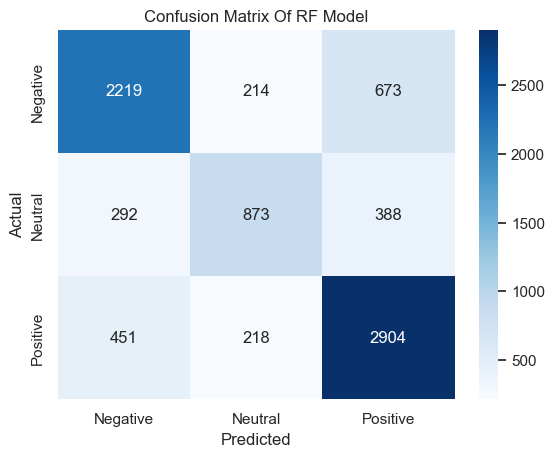

In [59]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
labels = ['Negative', 'Neutral', 'Positive']
cm = confusion_matrix(Test_Y,prediction,labels=labels)


# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Of RF Model')

# Show the plot
plt.show()

In [60]:
acRf = accuracy_score(Test_Y,prediction)
print("Accuracy:", acRf)

Accuracy: 0.728377065111759


# Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
model2 = LogisticRegression()
model2.fit(Train_X,Train_Y)

LogisticRegression()

In [62]:
prediction2= model2.predict(Test_X)
print("Logistic Regression ")
# # check the accuracy on the training set
log_train = model2.score(Train_X,Train_Y)
log_test  = model2.score(Test_X, Test_Y)
print("Accuracy of Training set:",log_train)
print("Accuracy of Test set   : ",log_test)
print(classification_report(Test_Y, prediction2))

Logistic Regression 
Accuracy of Training set: 0.8997418375094912
Accuracy of Test set   :  0.7972546161321672
              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81      3106
     Neutral       0.76      0.61      0.67      1553
    Positive       0.81      0.86      0.83      3573

    accuracy                           0.80      8232
   macro avg       0.79      0.76      0.77      8232
weighted avg       0.80      0.80      0.79      8232



In [63]:
aclog = accuracy_score(Test_Y,prediction2)
print("Accuracy:", aclog)

Accuracy: 0.7972546161321672


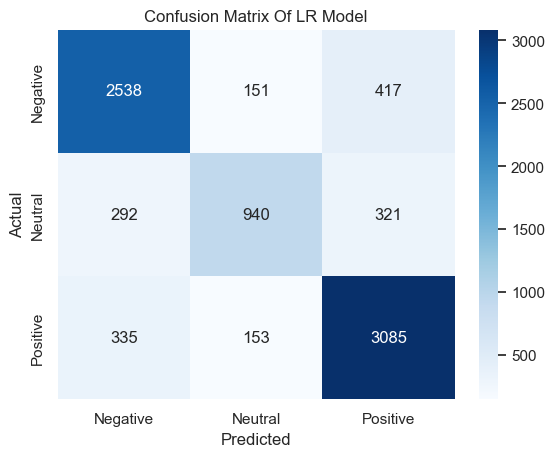

In [76]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
labels = ['Negative', 'Neutral', 'Positive']
cm = confusion_matrix(Test_Y,prediction2,labels=labels)


# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Of LR Model')

# Show the plot
plt.show()

# KNN CLASSIFICATION

In [78]:
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Train_X,Train_Y)


KNeighborsClassifier(n_neighbors=3)

In [79]:
y_pred = knn.predict(Test_X)

In [66]:
acknn = accuracy_score(Test_Y, y_pred)
print("Accuracy:", acknn)

Accuracy: 0.20493197278911565


In [67]:
knn_train = knn.score(Train_X,Train_Y)
knn_test  = knn.score(Test_X, Test_Y)
print("Accuracy of Training set:",knn_train)
print("Accuracy of Test set   : ",knn_test)
print(classification_report(Test_Y,y_pred))


Accuracy of Training set: 0.20965831435079726
Accuracy of Test set   :  0.20493197278911565
              precision    recall  f1-score   support

    Negative       0.82      0.02      0.05      3106
     Neutral       0.19      0.99      0.32      1553
    Positive       0.89      0.02      0.04      3573

    accuracy                           0.20      8232
   macro avg       0.63      0.35      0.14      8232
weighted avg       0.73      0.20      0.09      8232



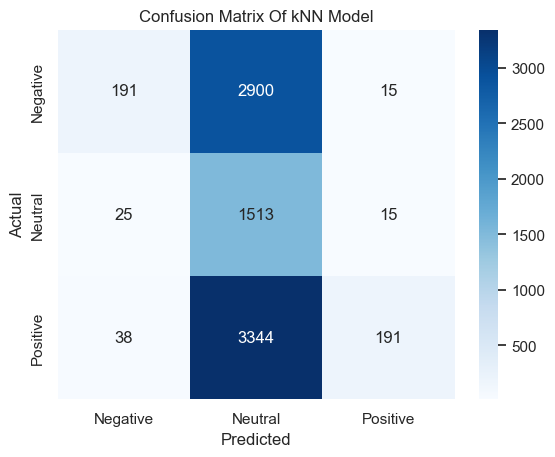

In [81]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
labels = ['Negative', 'Neutral', 'Positive']
cm = confusion_matrix(Test_Y,y_pred,labels=labels)


# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Of kNN Model')

# Show the plot
plt.show()

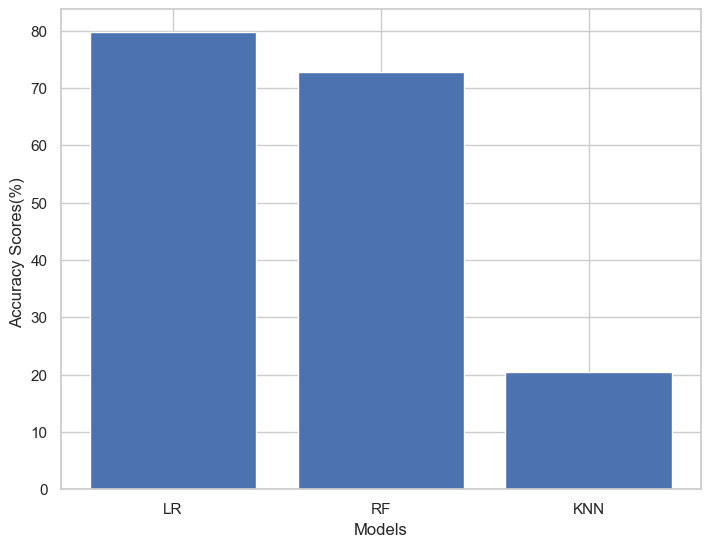

In [68]:
model_names = ['LR', 'RF', 'KNN']
accuracy_scores = [aclog*100,acRf*100,acknn*100]

# Create a line plot of the accuracy scores
# plt.plot(model_names, accuracy_scores)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# Add labels and title
# plt.xlabel('Model')
# plt.ylabel('Accuracy')
# plt.title('Accuracy of Different Models')

# # Show the plot
# plt.show()

ax.bar(model_names,accuracy_scores)
ax.set_ylabel('Accuracy Scores(%) ')
ax.set_xlabel('Models')
plt.show()

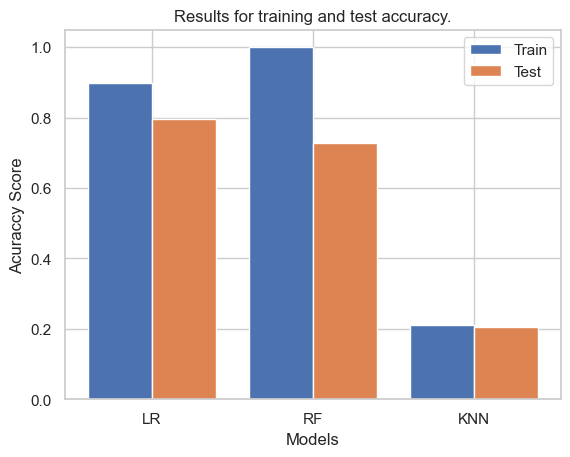

In [75]:
X = ['LR','RF','KNN']
Train = [log_train,rf_train,knn_train]
Test = [log_test,rf_test,knn_test]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Train, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, Test, 0.4, label = 'Test')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Acuraccy Score")
plt.title("Results for training and test accuracy.")
plt.legend()
plt.show()

In [ ]:
X = ['LR','RF','KNN']
Train = [log_train,rf_train,knn_train]
Test = [log_test,rf_test,knn_test]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Train, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, Test, 0.4, label = 'Test')
plt.bar(X_axis - 0.2, Test, 0.4, label = 'Test')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Acuraccy Score")
plt.title("Results for training and test accuracy.")
plt.legend()
plt.show()